In [21]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 2: Numerical Integration (or Quadrature) <a class="tocSkip">

# Lecture plan / learning objectives <a class="tocSkip">


* Introduction to numerical integration (also known by the term "quadrature").


* Learn how to derive and implement some of the simplest methods.


* See how we can use simple methods as the basis for a range of more complex schemes.


* More exposure to error analysis and convergence rates.


* More practice of your coding skills.


* Introduction to the generic principles of Richardson extrapolation and adaptive algorithms.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numerical-integration-or-Quadrature" data-toc-modified-id="Numerical-integration-or-Quadrature-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numerical integration or Quadrature</a></span><ul class="toc-item"><li><span><a href="#Some-calculus" data-toc-modified-id="Some-calculus-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Some calculus</a></span></li><li><span><a href="#Integration-of-data-or-of-functions" data-toc-modified-id="Integration-of-data-or-of-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Integration of data or of functions</a></span></li><li><span><a href="#A-simple-integration-example" data-toc-modified-id="A-simple-integration-example-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>A simple integration example</a></span></li></ul></li><li><span><a href="#The-Midpoint-rule" data-toc-modified-id="The-Midpoint-rule-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Midpoint rule</a></span><ul class="toc-item"><li><span><a href="#Implementing-a-midpoint-rule-function" data-toc-modified-id="Implementing-a-midpoint-rule-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implementing a midpoint rule function</a></span></li><li><span><a href="#Errors-and-convergence" data-toc-modified-id="Errors-and-convergence-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Errors and convergence</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Reminder:-Plotting-errors-using-a-log-log-plot-[repeated-from-ACSE-2]" data-toc-modified-id="Reminder:-Plotting-errors-using-a-log-log-plot-[repeated-from-ACSE-2]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reminder: Plotting errors using a log-log plot [repeated from ACSE-2]</a></span></li><li><span><a href="#Trapezoid-rule" data-toc-modified-id="Trapezoid-rule-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trapezoid rule</a></span><ul class="toc-item"><li><span><a href="#Implementing-a-trapezoidal-rule-function" data-toc-modified-id="Implementing-a-trapezoidal-rule-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Implementing a trapezoidal rule function</a></span></li><li><span><a href="#Errors-and-convergence" data-toc-modified-id="Errors-and-convergence-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Errors and convergence</a></span></li><li><span><a href="#Observations-/-comments" data-toc-modified-id="Observations-/-comments-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Observations / comments</a></span></li><li><span><a href="#The-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="The-composite-version-of-the-trapezoidal-rule-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>The composite version of the trapezoidal rule</a></span><ul class="toc-item"><li><span><a href="#Terminology---composite-quadrature-rules" data-toc-modified-id="Terminology---composite-quadrature-rules-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Terminology - composite quadrature rules</a></span></li></ul></li></ul></li><li><span><a href="#Quadrature-Accuracy-and-Errors" data-toc-modified-id="Quadrature-Accuracy-and-Errors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quadrature Accuracy and Errors</a></span><ul class="toc-item"><li><span><a href="#Error-analysis-(qualitative)" data-toc-modified-id="Error-analysis-(qualitative)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Error analysis (qualitative)</a></span></li><li><span><a href="#Error-analysis-(mathematical)-[$\star$]" data-toc-modified-id="Error-analysis-(mathematical)-[$\star$]-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Error analysis (mathematical) [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Trapezoidal-rule-error" data-toc-modified-id="Trapezoidal-rule-error-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Trapezoidal rule error</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Composite-trapezoidal-rule-error" data-toc-modified-id="Composite-trapezoidal-rule-error-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Composite trapezoidal rule error</a></span></li><li><span><a href="#Midpoint-rule-error" data-toc-modified-id="Midpoint-rule-error-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Midpoint rule error</a></span></li></ul></li></ul></li><li><span><a href="#Simpson's-rule" data-toc-modified-id="Simpson's-rule-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simpson's rule</a></span><ul class="toc-item"><li><span><a href="#Implementing-Simpson's-rule" data-toc-modified-id="Implementing-Simpson's-rule-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Implementing Simpson's rule</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#The-composite-version-of-Simpson's-Rule" data-toc-modified-id="The-composite-version-of-Simpson's-Rule-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The composite version of Simpson's Rule</a></span><ul class="toc-item"><li><span><a href="#Simpson's-rule-error" data-toc-modified-id="Simpson's-rule-error-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Simpson's rule error</a></span></li></ul></li></ul></li><li><span><a href="#Weddle's-rule-(extrapolated-Simpson's-rule)-[$\star$]" data-toc-modified-id="Weddle's-rule-(extrapolated-Simpson's-rule)-[$\star$]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Weddle's rule (extrapolated Simpson's rule) [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Newton-Cotes-quadrature-rules-[$\star$]" data-toc-modified-id="Newton-Cotes-quadrature-rules-[$\star$]-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Newton-Cotes quadrature rules [$\star$]</a></span><ul class="toc-item"><li><span><a href="#(N=1)-Trapezoidal" data-toc-modified-id="(N=1)-Trapezoidal-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>(N=1) Trapezoidal</a></span></li><li><span><a href="#(N=2)-Simpson's-rule" data-toc-modified-id="(N=2)-Simpson's-rule-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>(N=2) Simpson's rule</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Open-vs-Closed-Newton-Cotes-formulae" data-toc-modified-id="Open-vs-Closed-Newton-Cotes-formulae-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Open vs Closed Newton-Cotes formulae</a></span></li></ul></li><li><span><a href="#(Richardson)-extrapolation-and-Romberg-integration--[$\star$]" data-toc-modified-id="(Richardson)-extrapolation-and-Romberg-integration--[$\star$]-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>(Richardson) extrapolation and Romberg integration  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Adaptive-quadrature--[$\star$]" data-toc-modified-id="Adaptive-quadrature--[$\star$]-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Adaptive quadrature  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Application-to-a-simple-problem" data-toc-modified-id="Application-to-a-simple-problem-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Application to a simple problem</a></span></li><li><span><a href="#Application-to-a-complex-problem" data-toc-modified-id="Application-to-a-complex-problem-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Application to a complex problem</a></span></li></ul></li><li><span><a href="#Quadrature-method-comparison" data-toc-modified-id="Quadrature-method-comparison-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Quadrature method comparison</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Gaussian-quadrature--[$\star\star$]" data-toc-modified-id="Gaussian-quadrature--[$\star\star$]-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Gaussian quadrature  [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Gauss-Legendre-quadrature" data-toc-modified-id="Gauss-Legendre-quadrature-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Gauss-Legendre quadrature</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Changing-integration-limits" data-toc-modified-id="Changing-integration-limits-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Changing integration limits</a></span></li><li><span><a href="#Other-Gaussian-quadrature-families" data-toc-modified-id="Other-Gaussian-quadrature-families-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Other Gaussian quadrature families</a></span></li></ul></li><li><span><a href="#Higher-dimensions--[$\star$]" data-toc-modified-id="Higher-dimensions--[$\star$]-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Higher dimensions  [$\star$]</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Preliminary lecture comments <a class="tocSkip">

Note that there is scope for confusion with this content over the **degree polynomial used within a single interval** and the **number of subintervals that our total interval of interest may be split up into**.  

We will attempt to be consistent and use $N$ to refer to the "degree" of the polynomial (within an interval or subinterval), and $n$ to refer to the total number of "subintervals" (or sometimes "bins") we are using to cover our entire interval.
    
<br>
    
[Increasing either $N$ or $n$ should in principle lead to two results for a user ... what are they?]

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# we're going to be using some SciPy in-built integration routines
import scipy.integrate as si

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Numerical integration or Quadrature

[*Quadrature*](https://en.wikipedia.org/wiki/Numerical_integration) is the term used for numerical evaluation of a *definite* (i.e. over a range $[a,b]$) integral, or in 1D finding the area under a curve. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" style="width: 400px">

*(Wikipedia: https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg)*

<br>

If we have a function in 1D, $f(x)$, defined between $a$ and $b$, the *definite* [*integral*](http://en.wikipedia.org/wiki/Integral) over $[a,b]$ is defined as 

$$ I := \int_{a}^{b} f\left ( x \right )\,dx, $$

and its result is the area under the curve. 


[We'll generally use the notation $I$ for this quantity we wish to calculate, although $S$ is used in the figure above taken from Wikipedia!].

Knowing the value of the area under a curve is important to all kinds of applications. 

However, many expressions/functions we may encounter for these curves are difficult to integrate analytically, or a closed form expression for the function which governs their shape is unknown, and we may only have data at a finite number of discrete points (cf. one of the interpolation use cases from the previous lecture), and thus need to evaluate the integral approximately/numerically.

*Numerical integration* therefore has to be a fundamental part of any course on numerical methods.

## Some calculus

[<http://www.differencebetween.net/science/mathematics-statistics/difference-between-definite-and-indefinite-integrals/>]


<br>


Integration is an essential part of calculus, being the inverse of differentiation.  

Indeed if we drop the integration limits in the expression above (then we have *indefinite* integration) the result is a function: 

$$F(x) := \int f\left ( x \right )\,dx,$$ 

which note is only defined up to an arbitrary constant of course - what we mean by this is that we can add any *constant* to the $F$ defined in the line above and its derivative will still be $f$ (since the derivative of a constant is zero). 

This function ($F$) is sometimes referred to as the [*anti-derivative*](https://en.wikipedia.org/wiki/Antiderivative) of $f$ rather than the *indefinite integral*.

While we won't be doing indefinite integration here (our aim in this module is to compute approximations to the definite integral *numerically*, if you did want an expression for an indefinite integral you could try SymPy: <https://docs.sympy.org/latest/modules/integrals/integrals.html>), 

we still make use of indefinite integrals, or anti-derivatives, in our thinking as they appear in the [*fundamental theorem of calculus*](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus) which tells us that

$$ I := \int_{a}^{b} f\left ( x \right )dx = \left. F(x)\right|_{a}^{b} = F(b) - F(a). $$

Notice that *it doesn't matter* if we don't know the arbitrary constant mentioned above as it will be cancelled on the RHS in the case of definite integration: 

$$(F(b) + C) - (F(a) + C) = F(b) - F(a).$$ 

So while we need to be aware of the existence of this constant, for the purpose of quadrature we can just pretend it's zero.

<br>

[Aside: Mathematically you might say "we can assume, [*without loss of generality (w.l.o.g.)*](https://en.wikipedia.org/wiki/Without_loss_of_generality), that $C=0$."]

<br>

We will use $I$ as the notation for this definite integral (although it's denoted $S$ in the schematic above), it is a scalar number, and assuming $f$ returns real values, will also be a real number.

A further useful fundamental property of a definite integral is that

$$\int_{a}^{b} f\left ( x \right )\,dx = \int_{a}^{c} f\left ( x \right )\,dx + \int_{c}^{b} f\left ( x \right )\,dx,$$

where $c$ is a point between $a$ and $b$. 

This property can of course be applied iteratively to split the integral up across an arbitrary number of smaller intervals. 

Therefore, a basis for a numerical approximation to the full integral can be to split the integration interval up into a number of smaller intervals, compute the integral in each of these subintervals and sum the result.

<br>

[Aside: Note that this is related to the concept of the [*Riemann sum*](https://en.wikipedia.org/wiki/Riemann_sum) which is a mathematical approach used to establish definitions and results about integrals and integration. We won't go into this here, but if you are interested in some of the maths under-pinning integration take a look also at the [*Lebesgue integral*](https://en.wikipedia.org/wiki/Lebesgue_integration).]

<br>

If the function is complicated or unknown, we can *approximate* its value or variation (and hence integral) across/within each of these subintervals -- note that we have now performed a numerical *discretisation* of the function and in this case our associated numerical method to compute the integral is termed a *quadrature* or *numerical integration* method.

As with all lectures/topics in this module, the choice of both the approximation method/algorithm, as well as the size of the intervals (and hence the total number of intervals), will control the error in our numerical approximation to the true integral.  

Better approximation methods as well as smaller subintervals (and hence a larger number of intervals to cover our total interval of interest: $[a,b]$), will lead to lower errors, but will generally cost more to compute of course.

## Integration of data or of functions

Just as with interpolation we saw in the previous lecture, we have two potential application/use cases we need to consider:


<br>

1. We might be given sampling data at locations we have no control over and have to work with this, e.g. based on data from the real world, or data from a pre-run numerical simulation.  This data may or may not be at locations that are equally spaced.

<br>

2. We may actually be given the function $\;f\;$ and hence are able to sample it at locations we have some control over. This function may be very complicated, e.g. it may require the execution of a complex numerical model, and hence not be in a given closed form, and also may be very costly to evaluate. We therefore need to think about quadrature methods which limit the number of function evaluations (in code think function calls) required to achieve an accurate estimate of the integral.

<br>

Let's introduce the following notation for these data locations, wherever they may come from, at distinct points spanning our interval of interest:

$$ a = x_0\, < \,x_1\,<\,x_2\,<\,\ldots\,<\,x_{n-1}\,<x_n = b.$$

Remember we're using lower case $n$ for this purpose, and reserve $N$ to refer to polynomial degree within each subinterval. (Think splines from the previous lecture where we had a cubic (i.e. $N=3$) over each interval between data points).

Notice that these $n+1$ points split up our total interval into $n$ subintervals, or *bins*.

We can then, if needed, extend the idea above (where we introduced the intermediate point $c$ and split the integral $I$ into two integrals) to multiple intervals:

$$\int_{a}^{b} f\left ( x \right )\,dx = \sum_{i=0}^{n-1}  \int_{x_i}^{x_{i+1}} f\left ( x \right )\,dx,$$

where the $i$-th interval is defined as $[x_i,x_{i+1}]$ and hence $i$ runs from 0 to $n-1$, and 

$$\bigcup\limits_{i=0}^{n-1} \, [x_i,x_{i+1}] = [a,b].$$

<br>

[The big "U" notation here just means union over: <https://en.wikipedia.org/wiki/Union_(set_theory)#Notations>.

The square brackets indicate the domain is *closed*, i.e. contains the end points: <https://en.wikipedia.org/wiki/Bracket_(mathematics)#Intervals>]

## A simple integration example

Let's begin with a simple function to demonstrate some of the most basic methods for performing numerical integration:

$$f\left ( x \right ) := \sin \left ( x \right ),$$

and assume that we want to know the area under the $\,\sin\,$ function between 0 and $\pi$, i.e. $[a,b]=[0,\pi]$.

The indefinite integral (or anti-derivative) of $\,\sin \left ( x \right )\,$ is of course $\,-\cos \left ( x \right )\,$ (plus a constant of integration, $C$, which we can simply ignore as we saw above as it drops out as soon as we evaluate a *definite* integral).

In [23]:
# we can check with SymPy:

import sympy
sympy.init_printing()
from IPython.display import display, Math

x = sympy.Symbol('x', real=True)

f = sympy.sin(x)

display(Math(r'\int f(x)\,dx =')) 
display(sympy.integrate(f,x))

<IPython.core.display.Math object>

Since we know the indefinite integral exactly in this case, we can perform the definite integration (i.e. find the area under the curve) ourselves exactly by hand:

$$I :=  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) - (-\cos\left ( 0 \right )) =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = -(-1) + 1 = 2.
$$

[We included the constant $C$ here to just to emphasise again the fact that its presence doesn't matter - we can legitimately just not write it down in this type of expression.]

Let's start by plotting the function between these points.

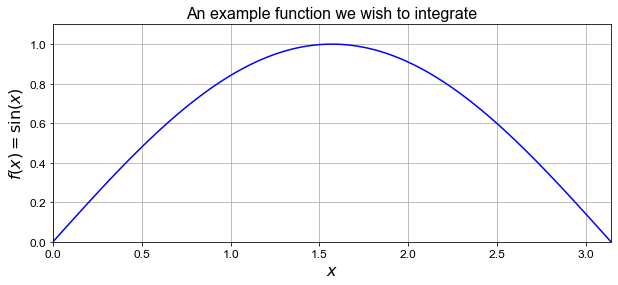

In [24]:
# set up figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# Get the value of pi from numpy and generate 100 equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)

# Calculate sin at these points.
y = np.sin(x)

# plot
ax1.plot(x, y, 'b')

# Set x axis limits between 0 and pi.
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('An example function we wish to integrate', fontsize=16)

# Overlay a grid.
ax1.grid(True);

Now let's investigate some simple quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know to be 2.

# The Midpoint rule

The *midpoint rule* is perhaps the simplest quadrature rule. 

For reasons that should be obvious from the next figure it is sometimes also called the *rectangle method*.

Consider one of the subintervals $\,[x_i, x_{i+1}].$

The midpoint rule approximates the integral over this (the $i$-th) subinterval by the area of a *rectangle*, with a base of length $\,(x_{i+1}-x_i)\,$ and a height given by the value of $\,f(x)\,$ at the midpoint of that interval (i.e. at $\,x=(x_{i+1}+x_i)/2$):

$$ I_M^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; f \left ( \frac {x_{i+1}+x_i} {2} \right ), \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The midpoint estimate of $I$ then simply involves summing up over all the subintervals:

$$I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).$$

<br>

Let's write some code to plot the idea as well as compute an estimate of the integral using the midpoint rule.

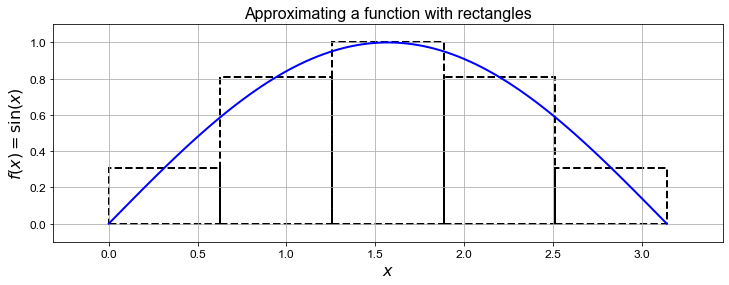

The sum of the areas of the rectangles is (I_M): 2.033281476926


In [25]:
# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('Approximating a function with rectangles', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))

## Implementing a midpoint rule function

Clearly the sum of the areas of all the rectangles provides an estimate of the true integral. In this particular case we observe an error of around 1.5% from the true value of 2.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not, however, contain a function for the midpoint rule, but it is trivial to create our own.]

As we are going to compare different rules below, let's implement a midpoint rule function.

In [26]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


## Errors and convergence

Now that we have a function which performs the midpoint rule, let's test it (perform code verificaton) by confirming that the error decreases as we increase the number of subintervals, and see how rapidly this decrease occurs (faster would clearly be better).

We will print the errors as we compute them, but also store them so we can plot the variation of the error with the number of subintervals.

The exact area found by direct integration = 2
Area 1    rectangle(s) = 3.141592654 (error = 1.141592654e+00)
Area 2    rectangle(s) = 2.221441469 (error = 2.214414691e-01)
Area 4    rectangle(s) = 2.052344306 (error = 5.234430595e-02)
Area 8    rectangle(s) = 2.012909086 (error = 1.290908560e-02)
Area 16   rectangle(s) = 2.003216378 (error = 3.216378168e-03)
Area 32   rectangle(s) = 2.000803416 (error = 8.034163099e-04)
Area 100  rectangle(s) = 2.000082249 (error = 8.224907099e-05)
Area 1000 rectangle(s) = 2.000000822 (error = 8.224672938e-07)


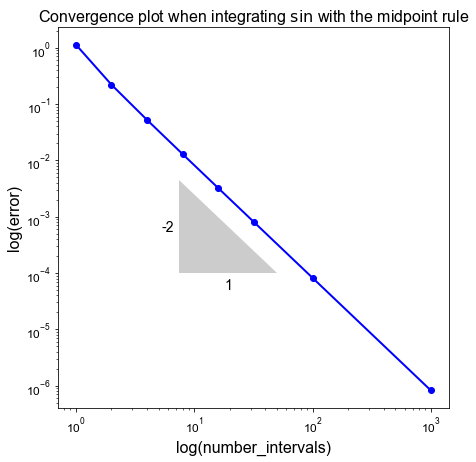

In [27]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Now let's test the midpoint function.
print('The exact area found by direct integration = 2')

# create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)
    print('Area {:<4d} rectangle(s) = {:.9f} (error = {:.9e})'.format(
        number_intervals, area, errors_M[i]))

# plot how the errors vary with interval size
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with the midpoint rule', fontsize=16)

# add a triangle to indicate the line slope
annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

## Observations


- With one rectangle, we are simply finding the area of a box of shape $\pi\, \times$ 1 ($\pi$ is the width of the rectangle and $1$ is the value of the function evaluated at the midpoint, $\pi/2$), so of course the result is $\pi$. 


- As we increase the number of subintervals, or rectangles, we increase the accuracy of our area.


- We can observe from the slope of the log-log plot of error against number of subintervals that the error is a quadratic function of the inverse of the number of subintervals (or equivalently is quadratically dependent on the spacing between the points - the interval size). 


- This demonstrates that (for this particular example at least), the method demonstrates second-order accuracy - if we halve the interval size the error goes down by a factor of 4!


- The simplicity of this method is its weakness, as rectangles (i.e. a flat top) are rarely a good approximation for the shape of a smooth function. 


- We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations as well as an extra evaluation of the function, and hence increases the overall computational cost. 


- Instead, let's consider another shape that follows the profile a little better ...

# Reminder: Plotting errors using a log-log plot [repeated from ACSE-2]

Why did we plot the convergence of the method (i.e. the error as a function of interval size (or number of subintervals)) using logarithmic scales on both the $x$ and the $y$ axis?

If you haven't already encountered this in your studies note that this is a very common thing to do for the following reason.

If we have a simple monomial relationship of the form 

$$ y = ax^k, $$

then taking the log of this equation (in any base, although note that unless otherwise stated we always assume that $\log$ is base $e$), we get

$$\log(y) = \log\left(ax^k\right) = \log(a) + \log\left(x^k\right) = \log(a) + k \log(x).$$

Thus if we were to plot the curve $y = ax^k$ (or data points from this expression) using log-log axes (i.e. letting $X:=\log(x)$ and $Y:=\log(y)$) then the curve/points would follow

$$Y = m X + c,$$

which we recognise as the equation for a *straight line* with slope $m$ (and intercept $c$).

So **if** we plot data using log-log axes and **if** we get a straight line then we know the underlying function must be of the form $\, y = ax^k $, where we can estimate $k$ be finding the slope of the line.

Similarly, if we get *approximately* a straight line, of *approximate* slope $k$, then we know that $\, y \approx ax^k $.  

This will be the scenario that generally applies for us where $\,y = ax^k + \mathcal{O}(x^{k+1})\,$ and the first term dominates.

In the example above we indeed get something very close to a straight line of slope approximately $-2$. Hence we can conclude for this example that

$$\text{Error} = \mathcal{O}\left(\text{number_intervals}^{-2}\right).$$

This why we said in the comments above that the method is second-order accurate.

For more on this see:
<https://en.wikipedia.org/wiki/Log%E2%80%93log_plot>

# Trapezoid rule

If we change the shape of the rectangle to a trapezoid (i.e. the top of the shape now being a linear line fit defined by the values of the function at the two end points of the subinterval, rather than the constant value used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $(x_{i+1}-x_i)$ and the left- and right-hand-sides equal to the values of the function at the two end points.  

In this case the area of the shape approximating the integral over one subinterval, is given by:

$$I_T^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; 
\left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)
\;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The trapezoidal estimate of $I$ then simply involves summing up over all the subintervals:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

Let's write some code to plot the idea and compute an estimate of the integral.

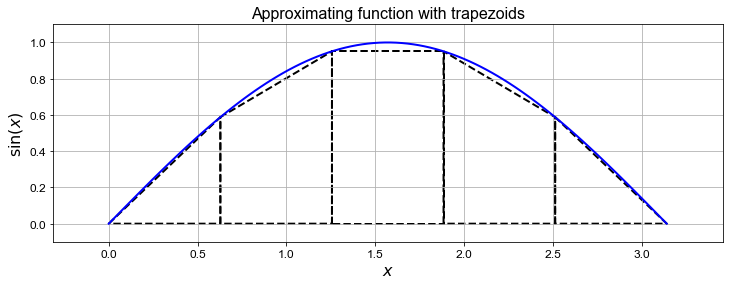

The sum of the areas of the trapezoids is (I_T): 1.933765598093


In [28]:
# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sin(x)$', fontsize=16)
ax1.set_title('Approximating function with trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
print('The sum of the areas of the trapezoids is (I_T): {:.12f}'.format(I_T))

## Implementing a trapezoidal rule function

Based on the image alone it looks as though this *should* provide a far more accurate result than the midpoint rule.

In addition, the tops of the shapes (now trapezoids) are approximating the variation of the function over each subinterval with a linear function, rather than a flat (constant) function we saw with the midpoint rule, and so it would seem to again follow that this *should* provide a more accurate estimate of the integral.

However, the error with 5 subintervals we saw above for the midpoint rule is clearly lower than we are now seeing for trapezoidal! (Our approximately 1.5% error magnitude with midpoint is now more like 3%).

Note that SciPy does contain a function for the trapezoid rule, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html">`scipy.integrate.trapz`</a>, but we'll make our own that works in a similar way to our midpoint rule function.

(Note the comment in the code on "redundant function evaluations" - can you see why this is and how to change things to improve efficiency?)

In [29]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    ** Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version. **
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

## Errors and convergence

Now let's test the function as we did for the midpoint rule.

In addition, let's also output the values computed using `scipy.integrate.trapz` to check they give the same results.

The exact area found by direct integration = 2
Area 1    trapezoid(s) = 0.0000000000000002 (error = 1.999999999999999778e+00)
Area 2    trapezoid(s) = 1.5707963267948968 (error = 4.292036732051032200e-01)
Area 4    trapezoid(s) = 1.8961188979370398 (error = 1.038811020629601956e-01)
Area 8    trapezoid(s) = 1.9742316019455510 (error = 2.576839805444897102e-02)
Area 16   trapezoid(s) = 1.9935703437723391 (error = 6.429656227660895951e-03)
Area 32   trapezoid(s) = 1.9983933609701445 (error = 1.606639029855472245e-03)
Area 100  trapezoid(s) = 1.9998355038874440 (error = 1.644961125559785131e-04)
Area 1000 trapezoid(s) = 1.9999983550656619 (error = 1.644934338074222069e-06)

Verificaton check: 
These are the corresponding values computed using Scipy's trapezoidal function and the difference with our computed result
0.0000000000000002, 0.0000000000000000e+00
1.5707963267948968, 0.0000000000000000e+00
1.8961188979370398, 0.0000000000000000e+00
1.9742316019455508, 2.2204460492503131e-16
1.993

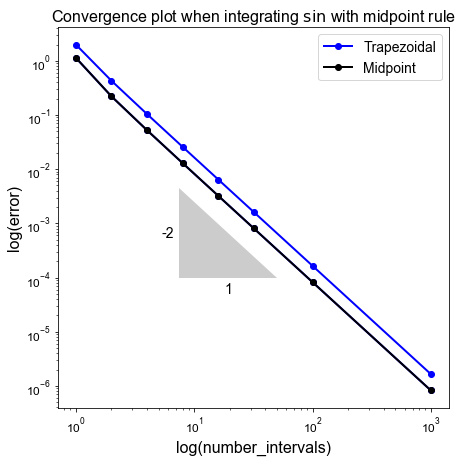

In [30]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the trapezoidal function.
print("The exact area found by direct integration = 2")
interval_sizes_T = [1, 2, 4, 8, 16, 32, 100, 1000]
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i] = abs(areas_T[i]-2)
    print('Area {:<4d} trapezoid(s) = {:.16f} (error = {:.18e})'.format(
        number_intervals, areas_T[i], errors_T[i]))

# compare the outputs from our code against those obtained with the Scipy function
print("\nVerificaton check: \nThese are the corresponding values computed using Scipy's"
      " trapezoidal function and the difference with our computed result")
for (i, number_intervals) in enumerate(interval_sizes_T):
    area_scipy_trap = si.trapz(f(np.linspace(0, np.pi, number_intervals+1)), 
                               np.linspace(0, np.pi, number_intervals+1))
    # see a comment below to explain the use of linspace here
    print('{0:.16f}, {1:.16e}'.format(area_scipy_trap, abs(area_scipy_trap - areas_T[i])))

    
# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with midpoint rule', fontsize=16)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

## Observations / comments


- Our function agrees with SciPy down to machine precision. This, along with the convergence of our result to the true solution, offers good evidence that we've implemented the algorithm correctly (i.e. code verification). However, note that there is always the possibility that it only works correctly for this one function so if we wanted to be really rigorous we should test on several functions, e.g. another funtion that is not trigonometric in nature.


- As for the midpoint rule, this method is also seen to be second-order accurate (again, for this function).


- For this function the errors with the trapezoidal rule are actually slightly larger than we found for the midpoint rule, which is *not* what we were expecting.


- Note that the `scipy.integrate.trapz` function takes data points, rather than the function and number of subintervals. Hence when calling `scipy.integrate.trapz` we give it the $(y(x),x)$ data given by `f(np.linspace(0, np.pi, number_intervals+1))` and  `np.linspace(0, np.pi, number_intervals+1))`.  To match the $\text{number_intervals}$ intervals used in our code, in order to test for exact agreement, we need to give `scipy.integrate.trapz` ($\text{number_intervals} + 1$) pieces of data. We can use `numpy.linspace` here since at present our codes assume uniformly sizes subintervals!

## The composite version of the trapezoidal rule

Of course if we think about what we're doing here we recognise that we can save some computational time (specifically function evaluations, which could each be very expensive so in some situations this may be especially worthwhile.).

Above we wrote down the mathematical expression for the scheme:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i),$$

(and this is *exactly* what we implemented in our code).

But notice that under the assumption that the $x$ spacing of the data is uniform (say, $\Delta x$) this is exactly equivalent to

$$I_T := [f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\frac{\Delta x}{2},$$

which emphasises that we can implement a version of the rule which keeps the number of function evaluations to a minimum, i.e. which reduces the cost of the naive implementation.  

Note that this idea (minimising function evaluations) can of course also be generalised to the case where the $x$ points are not equally spaced, we just can't write the final expression in such a simple form (specifically we can't pull out the factor $\Delta x$ and have just "1" and "2" multipliers of the function values).

The method implemented in this manner would be termed the *composite trapezoidal rule*.  

See homework exercise.

### Terminology - composite quadrature rules 

A clarification on terminology:

Note that when we move onto some higher-order quadrature rules we can actually start getting reasonably accurate results using just a single (sub) interval. 

In this case we use the language ''XXXX rule'' for that rule applied to a *single* interval, and the ''*composite* XXXX rule'' to indicate that we have split up the total integration interval into a number of subintervals. Clearly the actual implementation of a composite rule will then in general look to follow an approach that minimises the number of function evaluations.

# Quadrature Accuracy and Errors

Another observation here is that in this particular case of half a sine wave, the trapezoid rule always *under-estimates* the area, whereas the midpoint rule *over-estimates*. 

We noted that, perhaps surprisingl, the midpoint rule is more accurate than the trapezoid rule - the reason for this is not immediately obvious from the discussions and the images above.

<br>

Note that the accuracy of a quadrature rule is predicted by examining its behaviour in practice with *polynomials*. 

We say that the **degree of accuracy** or the **degree of precision** of a quadrature rule is equal to $M$ if it is exact for all polynomials of degree up to and including $M$, but not exact for some polynomial of degree $M+1$.


Clearly both the midpoint and trapezoid rules will give the exact result for both constant and linear functions,

but they are not exact for quadratics 

[you could test our codes yourself on the function $x^2$ to demonstrate this].

Therefore, they both have a degree of precision of 1.

## Error analysis (qualitative)

For the "concave-down" (i.e. the first half of a sine wave) function we chose above, notice from the plot that the trapezoidal rule will **consistently underestimate** the area under the curve, as the line segments approximating the function are always under the concave function curve.

In contrast, the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the **errors will cancel** each other out. 

This is why, *for this particular example*, the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  

While this result turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used to formally construct upper bounds on the quadrature error for both methods. 

We know that the error when integrating constant and linear functions is zero for our two rules, so let's first consider an example of integrating a quadratic polynomial.

We know analytically that

$$\int_{0}^{1} x^{2}\,dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}.$$

Whereas numerically the midpoint rule on a single interval gives an approximation of

\begin{equation}
I_M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4},
\end{equation}

while the trapezoidal rule gives

\begin{equation}
I_T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}.
\end{equation}

The error for $I_M$ is therefore $1/3 - 1/4 = 1/12$, while the error for $I_T$ is $1/3 - 1/2 = -1/6$.

Therefore, the midpoint rule is twice as accurate as the trapezoid rule:

$$|E_M| = \frac{1}{2} |E_T|,$$

where $|E|$ indicates the error (the absolute value of the difference from the exact solution).

This is the case for this simple example, and we can see from the actual error values printed above that it also appears to be approximately true for the sine (which note is not a simple polynomial) case as well.

We will make use of this knowledge to generate new more accurate quadrature rules below [can you think of a way we might try to do this?], but first let's sketch how you can go about a more rigorous analysis/estimation of errors.

<div class="optional">

## Error analysis (mathematical) [$\star$]

We are approximating

$$ I := \int_{a}^{b} f\left ( x \right )\,dx, $$

with a quadrature rule of the form (in the case of the Trapezoidal rule)

$$I_T :=  \left(\frac{f(b) + f(a)}{2}\right )\, (b-a).$$


More generally (and we will develop this idea formally below where we talk about the family of Newton-Cotes quadrature rules) what we are actually doing with the midpoint and trapezoidal rules is first approximating the function $f(x)$ with a *polynomial interpolant*, $P_N(x)$, over each (sub-)interval, and our approximation to the integral is given by 


$$
I_N := \int_a^b\,P_N(x)\,dx  \approx I,
$$

where $P_N(x)$ is the degree $N$ interpolating polynomial, and for which due to its simple form we are able to write down an expression which evaluates its integral exactly.  For the midpoint case $N=0$, while for the trapezoidal case $N=1$.

Note that there is a bit of **scope for confusion** here as we are clearly going to have (at least) two possibilities to try and improve the accuracy of our approximate integral: change the number of subintervals ($n$), or the polynomial order ($N$). 

Let's assume for the time being that we have a single interval that spans all of $[a,b]$, i.e. assume that $n=1$.

Later we will apply our analysis to a subinterval $[x_i,x_{i+1}]$ and sum the corresponding subinterval errors to obtain an error for the composite version of each quadrature rule.

Recall from the previous lecture that the error in polynomial interpolation can be written as

$$ f(x) - P_N(x) =: R_N(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_N)}{(N+1)!} f^{(N+1)}(c_x) = \Psi_N(x)\frac{f^{(N+1)}(c_x)}{(N+1)!}, $$

where $c_x$ is *some* value/point between the maximum and minimum of $x_0, \ldots, x_N$ and $x$,

and where 

$$ \Psi_N(x) := \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N). $$

This means that our quadrature error satisfies

$$\begin{align*}
E_N 
&= I - I_N = \int_{a}^{b} f\left ( x \right )\, dx - \int_a^b\,P_N\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} f\left ( x \right ) - P_N\left ( x \right ) \, dx\\[5pt] 
&= \int_{a}^{b} R_N\left ( x \right )\, dx.
\end{align*}$$

</div>

<div class="optional">

### Trapezoidal rule error

The trapezoidal rule follows from taking $N=1$ in which case we have the interpolation error over the interval $[a,b]$:

$$R_1(x) = (x - a) (x - b) \frac{f''(c_x)}{2},$$

for some $c_x\in[a,b]$, and thus 

$$\begin{align*}
E_T \equiv E_1 
& = \int_a^b (x - a) (x - b) \frac{f''(c_x)}{2} \,dx \\[5pt]
& = \frac{f''(c_x)}{2}  \int_a^b (x - a) (x - b) \,dx \\[5pt]
& = \frac{f''(c_x)}{2}  \int_a^b x^2 - (a+b)x + ab  \,dx \\[5pt]
& = \frac{f''(c_x)}{2}  \left[\frac{1}{3}x^3 - \frac{(a+b)}{2}x^2 + abx \right]_a^b\\[5pt]
& = \frac{f''(c_x)}{2}  \left(\frac{1}{3}(b^3 - a^3) - \frac{(a+b)}{2}(b^2 - a^2) + ab(b - a) \right)\\[5pt]
& = \frac{f''(c_x)}{12}  \left(2 (b^3 - a^3) - 3(a+b)(b^2 - a^2) + 6ab(b - a) \right)\\[5pt]
& = \frac{f''(c_x)}{12}  \left(2 (b^3 - a^3) - 3(b^3 - a^3 +ab^2-a^2b)+ 6ab^2 - 6a^2b \right)\\[5pt]
& = \frac{f''(c_x)}{12}  \left( a^3 - 3a^2b + 3ab^2 -b^3 \right)\\[5pt]
& = -\frac{(b-a)^3}{12} f''(c_x).
\end{align*}$$

</div>

<div class="optional">

### Observations


- If $f''>0$ (i.e. the function is concave up), then this tells us that the error is negative (as we assume $b>a$) and the trapezoidal rule in this case over-estimates the true value.


- Similarly, if it is concave down ($f''<0$) then the estimate is an under-estimate (as we saw above).


- Over a single interval the error is cubically dependent on the interval size (interval_size = $b-a$).

</div>

<div class="optional">

### Composite trapezoidal rule error

The composite trapezoidal rule took the form

$$ \int_{a}^{b} f\left ( x \right )\, dx \approx \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i),$$

where the LHS can be written as

$$ I := \int_{a}^{b} f\left ( x \right )\, dx = \sum_{i=0}^{n-1}\,   \int_{x_i}^{x_{i+1}}\,f\left ( x \right )\,dx, $$

and the RHS is equivalent to 

$$ I_T^n \equiv I_1^n := \sum_{i=0}^{n-1}\, \int_{x_i}^{x_{i+1}} \,P_1 \left ( x \right )\,dx, $$

the superscript $n$ here is used to remind us that we are dealing with the composite version of the rule over $n$ subintervals.

The error is therefore

$$ E_1^n = I - I_1^n = \sum_{i=0}^{n-1}\, \int_{x_i}^{x_{i+1}} \, f \left ( x \right ) - P_1 \left ( x \right )\,dx, $$

i.e. the sum of the errors in the integral of the function over each subinterval.  But we can reapply our result above on the error over an arbitrary interval $[a,b]$ to the subinterval $[x_i,x_{i+1}]$ to obtain

$$ E_T^n \equiv E_1^n = -\sum_{i=0}^{n-1}\, \frac{(x_{i+1}-x_i)^3}{12} f''\left(c_{x_i}\right), $$

for some $c_{x_i}\in[x_i,x_{i+1}]$.

If we assume uniform intervals then $x_{i+1}-x_i = \Delta x$ and $n \Delta x = (b-a)$, and so we can rewrite this as

\begin{align*} 
E_1^n & = -\sum_{i=0}^{n-1}\, \frac{(x_{i+1}-x_i)^3}{12} f''\left(c_{x_i}\right) \\[5pt]
& = - \sum_{i=0}^{n-1}\, \frac{\Delta x^3}{12} f''\left(c_{x_i}\right) \\[5pt]
& = - \frac{\Delta x^3}{12} \sum_{i=0}^{n-1}\,f''\left(c_{x_i}\right) \\[5pt]
& = - \frac{\Delta x^2}{12} \,\Delta x\, \sum_{i=0}^{n-1}\,f''\left(c_{x_i}\right) \\[5pt]
& = - \frac{\Delta x^2}{12} \,\frac{(b-a)}{n}\, \sum_{i=0}^{n-1}\,f''\left(c_{x_i}\right) \\[5pt]
&= -\frac{1}{12} \Delta x^2 (b-a) \frac{1}{n} \sum_{i=0}^{n-1}\,  f''\left(c_{x_i}\right).
\end{align*}

We can interpret the $(1/n)\sum_{i=0}^{n-1}\,  f''\left(c_{x_i}\right)$ term, where $c_{x_i}$ for each $i$ is some unknown value within each subinterval, as being a kind of average value for the second-derivative over our *full* interval $[a,b]$, and as $n$ is increased it converges to the average value (basically because there is a tighter and tighter constraint on each of the unknown $c_{x_i}$ values).  

This expression then indeed proves that the Trapezoidal rule is second-order accurate in the interval size $\Delta x$ (or equivalently the number of subintervals).

Note that we can turn this error estimate into an *error bound* by replacing the average value of the second-derivative with its maximum absolute value (an average of as set always being less than or equal to its maximum absolute value):

$$ \left| E_1^n \right| \le \frac{1}{12} \Delta x^2 (b-a) \max_{x\in[a,b]}\, \left| f''(x) \right|, $$

or as $n \Delta x = (b-a)$

$$ 
\boxed{\left| E_1^n \right| \le \frac{(b-a)^3}{12n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|} 
$$

<br>

Note further that in the limit of a large number of subintervals the mathematical expression for the average value of the second-derivative actually converges to the integral of $f''$ over $[a,b]$, divided by $(b-a)$, which by the [fundamental theorem of calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus#Second_part) is equal to $(f'(b) - f'(a))/(b-a)$ and therefore in this asymptotic limit we have

$$ E_1^n = -\frac{1}{12} \Delta x^2 \left( f'(b) - f'(a) \right). $$

</div>

<div class="optional">

### Midpoint rule error

We won't go through the same derivation for the midpoint rule here (but see the homework exercise).

We will simply state that the formal analysis for the midpoint rule indeed arrives at an error estimate which is exactly half that of the Trapezoidal rule, i.e.

$$ 
\boxed{
\left| E_M^n \right| \le \frac{(b-a)^3}{24n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|} 
$$

See [https://en.wikipedia.org/wiki/Riemann_sum](https://en.wikipedia.org/wiki/Riemann_sum) for "confirmation" of both of these error bounds - both Midpoint and Trapezoid are listed under the Methods section.

<br>
    
Note also that, as argued above, the actual signs of the Midpoint and Trapezoidal rule errors will be opposite to one another.

This hints to the fact that if we sum suitable multiples of the two estimates of the integral we obtain for Midpoint and Trapezoidal, we should to a certain extent be able to cancel out this error. We will do this next.

</div>

# Simpson's rule

Knowing the error estimates from the two rules explored so far opens up the potential for us to combine them in an appropriate manner to create a new quadrature rule, generally more accurate than either one separately. 

Suppose $I_S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  

Then, as seen above, as $I_T$ has an error that is approximately $-2$ times the error in $I_M$, the following relation must hold approximately:


$$I_S - I_T \approx -2 \left ( I_S - I_M\right ).$$


This follows from the fact that $\,I - I_T \approx -2 \left ( I - I_M\right )$, provided that $I_S$ is closer to $I$ than either of the other two estimates.

Replacing this approximately equals sign with actual equality defines $I_S$ for us in terms of things we know. 

We can rearrange this to give an expression for $I_S$ that yields a more accurate estimate of the integral than either $I_M$ or $I_T$:

$$I_S := \frac{2}{3}I_M + \frac{1}{3}I_T.$$

What we're doing here is using the fact that we know something about (the *leading order* behaviour of the) two errors, and we can therefore combine them to cancel this error to a certain extent.

This estimate will generally be more accurate than either $M$ or $T$ alone. The error won't actually be zero in general as we're only cancelling out the leading order term in the error, but a consequence is that we will be left with higher-degree terms in the error expansion of the new quadrature rule which should be smaller (at least in the asymptotic limit), and converge faster. 

The resulting quadrature method in this case is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule):

\begin{align*}
I_S &:= \frac{2}{3}I_M + \frac{1}{3}I_T \\[5pt]
&= \frac{2}{3}  (b-a)f\left ( \frac{a+b}{2}\right ) + \frac{1}{3}(b-a)\frac{(f(a) + f(b))}{2} \\[5pt]
& = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.


Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

See the homework exercise, and note that we'll come back to this idea a bit later when we introduce the Newton-Cotes family of quadrature rules.

Let's plot what this method is doing and compute the integral for our sine case.

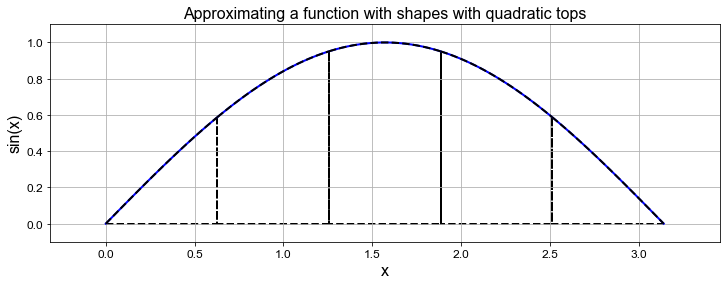

The Simpson's rule approximation (I_S): 2.000109517315


In [31]:
# this is a matplotlib function that allows us to plot polygons
# use this to plot the straight sides, and add an approximate
# quadratic at the top.
from matplotlib.patches import Polygon

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.set_title('Approximating a function with shapes with quadratic tops', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)

I_S = 0.0

for i in range(number_intervals):
    # use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # add the quadratic top - fit a quadratic using numpy
    poly_coeff = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    # plot the quadratic using 20 plotting points within the interval 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             f(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # add in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

plt.show()
print("The Simpson's rule approximation (I_S): {:.12f}".format(I_S))

## Implementing Simpson's rule

Note in the above image the approximation of the quadratic over each subinterval is very good - visually it looks exact but of course it isn't as we can exactly approximate a trigonometric function with a polynomial.

This is confirmed by the very accurate approximation to the integral. 

But note that here we have had to additionally evaluate the function at the midpoints of the subintervals; we need to bear this in mind when comparing methods. With 5 subintervals the number of function evaluations we have used so far is: Midpoint - 5; Trapezoidal (the composite version) - 6; Simpson's - 11 (at least with this implementation of the method - see later).

Of course the agreement (visually and quantitatively) won't be quite so good for complicated, rapidly varying functions.

Let's now complete an implementation of Simpson's rule and test it on our sine function.

In [32]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

The exact area found by direct integration = 2
Area 1    for Simpson = 2.0943951023931953 (error = 9.439510239e-02)
Area 2    for Simpson = 2.0045597549844207 (error = 4.559754984e-03)
Area 4    for Simpson = 2.0002691699483877 (error = 2.691699484e-04)
Area 8    for Simpson = 2.0000165910479355 (error = 1.659104794e-05)
Area 16   for Simpson = 2.0000010333694127 (error = 1.033369413e-06)
Area 32   for Simpson = 2.0000000645300018 (error = 6.453000179e-08)
Area 100  for Simpson = 2.0000000006764709 (error = 6.764708793e-10)
Area 1000 for Simpson = 2.0000000000000679 (error = 6.794564911e-14)

Verificaton check: These are the corresponding values computed using SciPy  (BUT read the comment in the code above!)
2.0943951023931953, 0.0000000000000000e+00
2.0045597549844207, 0.0000000000000000e+00
2.0002691699483877, 0.0000000000000000e+00
2.0000165910479355, 0.0000000000000000e+00
2.0000010333694132, 4.4408920985006262e-16
2.0000000645300018, 0.0000000000000000e+00
2.0000000006764718, 8.88

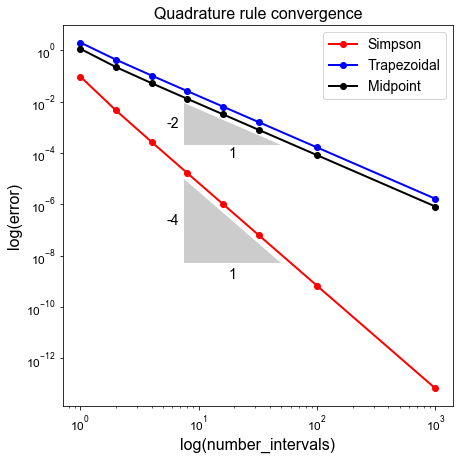

In [33]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the Simpson's rule function.
print("The exact area found by direct integration = 2")
interval_sizes_S = [1, 2, 4, 8, 16, 32, 100, 1000]
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
        number_intervals, areas_S[i], errors_S[i]))
    
    
print('\nVerificaton check: These are the corresponding values computed using SciPy' 
      '  (BUT read the comment in the code above!)')
# note that since our function above takes the function and can evaluate it wherever it likes, 
# it essentially doubles the number of intervals by evaluating the function at the mid points.
# The scipy function takes in discrete data points, and hence fits a polynomial across two
# intervals. 
# Therefore to get the same values we need to explicitly double the number of intervals in the
# function call: 
# instead of passing it 'number_intervals' points, we pass it '2*number_intervals + 1' points
# Also the SciPy implementation obviously needs an even number of intervals (equivalently an ODD
# number of data points)
# Note we didn't have this issue with the SciPy version of trapezoidal as both the function and
# data point passing versions of the method only need two (end) points per interval.
for (i, number_intervals) in enumerate(interval_sizes_S):
    area_scipy_simpson = si.simps(f(np.linspace(0, np.pi, 2*number_intervals + 1)),
                   np.linspace(0, np.pi, 2*number_intervals + 1))
    print('{0:.16f}, {1:.16e}'.format(area_scipy_simpson, abs(area_scipy_simpson - areas_S[i])))
    

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 2e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((5e1, 5e-9), (-4, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

## Observations


- The errors are lower than for the midpoint and trapezoidal rules, and the method converge more rapidly - i.e. the relative improvement only gets better for more subintervals.


- This expression now integrates up to cubics exactly (by construction), so it is degree of precision 3 (as confirmed by the convergence plot above).


- We're getting down to errors close to machine precision now when we use 1000 subintervals. But remember we may well either have a relatively small number of data points, or want to minimise the number of function evaluations well below this relatively high number. This will mean that for problems with lots of variation, and/or in higher dimensions, that we still work to do in improving our quadrature methods.


- As was the case with our first Trapezoidal implementation, we are performing unnecessary function evaluations here; we can again fix this issue through the implementation of a *composite* version of the rule.

## The composite version of Simpson's Rule

If we assume that our interval $[a,b]$ has been split up into $n$ intervals (or $n+1$ data points) we can save some function evaluations by writing Simpson's Rule in the following form (note here we do not introduce any additional midpoint function evaluations)

\begin{align*}
I_{S} 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), 
or more precisely the *composite Simpson's 1/3 rule*.

This is the version of Simpson's rule implemented by Scipy [`scipy.interpolate.simps`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html).


Note that this way of formulating Simpson's rule (where we do not allow additional function evaluations at the midpoints of intervals - we assume we are only in a position to use the given data points) requires that $n$ be even.

This way of writing the composite form in the case of $n=2$ is equivalent to the formula over $[a,b]$ that introduced the additional midpoint location $c$.

In [34]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [35]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

print("The area found by direct integration = 2")
for i in (2, 4, 8, 16, 32, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, f, i)
    print('Area {0:<4d} interval(s), {1:<4d} function evaluations = {2:.16f} (error = {3:.16e})'.format(
        i, i+1, area, abs(area-2)))


print("\nLet's call the SciPy routine to check we get ~ the same answers:")
for i in (2, 4, 8, 16, 32, 100, 1000):
    # we have to give the SciPy function i+1 data points, to match the i subintervals specified in our implementation
    print(si.simps(f(np.linspace(0, np.pi, i+1)),
                   np.linspace(0, np.pi, i+1)))

The area found by direct integration = 2
Area 2    interval(s), 3    function evaluations = 2.0943951023931953 (error = 9.4395102393195263e-02)
Area 4    interval(s), 5    function evaluations = 2.0045597549844207 (error = 4.5597549844207386e-03)
Area 8    interval(s), 9    function evaluations = 2.0002691699483881 (error = 2.6916994838810382e-04)
Area 16   interval(s), 17   function evaluations = 2.0000165910479355 (error = 1.6591047935499148e-05)
Area 32   interval(s), 33   function evaluations = 2.0000010333694127 (error = 1.0333694127062643e-06)
Area 100  interval(s), 101  function evaluations = 2.0000000108245044 (error = 1.0824504403927904e-08)
Area 1000 interval(s), 1001 function evaluations = 2.0000000000010787 (error = 1.0786926907258021e-12)

Let's call the SciPy routine to check we get ~ the same answers:
2.0943951023931953
2.0045597549844207
2.0002691699483877
2.0000165910479355
2.000001033369413
2.000000010824504
2.0000000000010822


### Simpson's rule error

We can go through the exact same mathematical steps as for the trapezoidal rule above to compute the error in Simpson's rule applied over the full interval $[a,b]$ (i.e. the error over a single interval):

\begin{align*}
E_S 
&= I - I_2 \\[5pt]
&= \int_{a}^{b} \, f\left ( x \right )\, dx - \int_a^b\,P_2\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} \, f\left ( x \right ) - P_2\left ( x \right ) \, dx\\[5pt] 
&= \int_{a}^{b} \, R_2\left ( x \right )\, dx \\[5pt] 
&\vdots \\[5pt]
&=-\frac{1}{90}\left(\frac{b-a}{2}\right)^5 f^{(4)}\left(c_x\right).
\end{align*}

[Remember that a superscipt number in brackets indicates a derivative - here the fourth derivative of $f$.]

Note this isn't a mistake - we have gained one order of accuracy over what might have been expected due to cancellation of the leading order term.

This is *a* reason for the popularity of Simpson's rule.

Note that all Newton-Cotes quadrature rules (introduced in a few cells) of even order have this additional order of accuracy property.

Summing up over $n$ subintervals yields the error bound

$$ 
\boxed{
\left| E_S^n \right| \;\; \le \;\;\frac{\Delta x^4}{180}  (b-a) \max_{x\in[a,b]}\, \left| f^{(4)}(x) \right| \;\; =  \;\;\frac{(b-a)^5}{180n^4}  \max_{x\in[a,b]}\, \left| f^{(4)}(x) \right|
}$$

where the $\Delta x$ and $n$ here refer to the spacing between function evaluations, and the corresponding number of subintervals (i.e. the approach we took in `simpsons_composite_rule` where we do not perform additional function evaluations at the midpoints of subintervals, but rather span two subintervals).


The presence of the fourth derivative in the leading order error shows that Simpson integrates third-order polynomials exactly, i.e. its degree of precision is 4.

The presence of the $1/n^4$ factor shows that for every doubling of $n$, or halving of $\Delta x$, the error drops by a factor of 16 (i.e. $2^4$) - the method is fourth-order accurate. This agrees with what we saw in the convergence plot above.

<div class="optional">

# Weddle's rule (extrapolated Simpson's rule) [$\star$]

We noted above that Simpson's rule is fourth-order accurate.

Suppose we take an approximation to $I$ using $n$ intervals with Simpson's rule and call the result $I_S$, and then apply Simpson's rule with double the number of intervals ($2n$) and call the result $I_{S_2}$. 

Then we have two estimates for the integral where we expect $I_{S_2}$ to be approximately $2^4=16$ times more accurate than $S$. In particular, we expect the lowest (i.e. the leading) order error term in $I_{S_2}$ to be precisely one sixteenth that of $I_S$.

Similar to how we derived Simpson's rule by combining what we knew of the error for the midpoint and trapezoidal rules, with this knowledge we can combine the two estimates from Simpson's rule to derive an even more accurate estimate of $I$:

Let's call this more accurate rule $I_W$, which we can find by solving:

$$I_W - I_S = 16 \left ( I_W - I_{S_2} \right ),$$

for $I_W$.

A bit of manipulation:

\begin{align*}
& \;\;\; I_W - I_S = 16 \left ( I_W - I_{S_2} \right ) \\[5pt]
\implies & \;\;\; I_W - I_S = 16 I_W - 16 I_{S_2} \\[5pt]
\implies & \;\;\; 15 I_W  = 16 I_{S_2} - I_S \\[5pt]
\implies & \;\;\; 15 I_W  = 15 I_{S_2} + (I_{S_2} - I_S) ,
\end{align*}

leads us to the expression

$$ I_W = I_{S_2} + \frac {\left (I_{S_2} - I_S \right )}{15}.$$

This is known as *Weddle's rule*, or the *extrapolated Simpson's rule* because it uses two different values for the interval size and *extrapolates* from these two to obtain an even more accurate result. 

Making a function for this rule is easy as we can just call our Simpson's rule functions with two values for the number of intervals.

Doing this is a homework exercise and should yield the following updated convergence plot

<img src="./figures/weddle_convergence.png" width=500x>


</div>

<div class="optional">

## Observations

- You can see our final rule is much more accurate for fewer required intervals. 


- Indeed we are down at the limits where round-off errors are clearly affecting our results and impacting on convergence rates.

</div>

<div class="optional">

# Newton-Cotes quadrature rules [$\star$]

Taking the idea behind Simpson's rule, which can be interpreted as (or derived by) fitting a quadratic Lagrange interpolating polynomial to *equally spaced* points over an interval, and extending to any order Lagrange polynomial leads to the *Newton-Cotes* family of quadrature rules.

[Of course the midpoint and trapezoidal rules fit within this description as well with the fitting of a constant and a linear polynomial.]

Assume we have $N+1$ equally spaced data points $(x_i,y_i)$ [we will see examples where these points are not fixed in advance below]. We will assume we are dealing with the integration of a known function and so $y_i = f(x_i)$.

**Note we are trying to be careful about the distinction between $n$ and $N$ throughout this lecture!**

We know from the lecture on interpolation that we can fit an order $N$ polynomial exactly through these points; we call this  polynomial $P_N(x)$.

Recall the Lagrange form of $P_N$ was defined as

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

with the *Lagrange basis polynomials*  defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.


An approximation to our integral is then given by

\begin{align*}
I &\approx \int_a^b\,P_N(x)\,dx,\\[10pt]
&= \sum_{i=0}^{N}\, \left[\,f(x_i) \int_a^b\, \ell_i(x)\, dx\right],\\[10pt]
&=\sum_{i=0}^{N}\, A_i \, f(x_i),
\end{align*}

where

$$ A_i := \int_a^b\, \ell_i(x)\, dx, \;\;\;\; i = 0,1,\ldots,N. $$


Simply by varying $N$ we can come up with quadrature rules of arbitrary order. 

Let's check we can recreate the schemes we have already seen via this approach.

</div>

<div class="optional">

## (N=1) Trapezoidal

If $N=1$ (i.e. two data points) then the Lagrange basis functions are 

$$\ell_0(x) = \frac{x-x_1}{x_0-x_1}= \frac{x-b}{a-b}, \;\;\;\;\;\;\;\;
\ell_1(x) = \frac{x-x_0}{x_1-x_0} = \frac{x-a}{b-a},$$

with integrals

\begin{align*}
A_0 & := \int_a^b\, \ell_0(x)\, dx =  \frac{1}{a-b}\int_a^b\, (x-b)\, dx  \\[5pt]
&= \frac{1}{a-b}\left[\frac{x^2}{2} - b x\right]_a^b = \frac{1}{a-b} \left[\frac{b^2 - a^2}{2} - b (b-a)\right] \\[5pt]
&= -\frac 12 (a+b) + b = \frac{b-a}2,
\end{align*}

and

\begin{align*}
A_1 & := \int_a^b\, \ell_1(x)\, dx =  \frac{1}{b-a}\int_a^b\, (x-a)\, dx  \\[5pt]
&= \frac{1}{b-a}\left[\frac{x^2}{2} - a x\right]_a^b = \frac{1}{b-a} \left[\frac{b^2 - a^2}{2} -a (b-a)\right] \\[5pt]
&= \frac 12 (b+a) - a = \frac{b-a}2,
\end{align*}

and so our quadrature rule over a single interval can be written as

\begin{align*}
I \approx \sum_{i=0}^{1}\, A_i \, f(x_i) = 
A_0 f(a) + A_1 f(b) = (b - a)\frac{(f(a) + f(b))}{2},
\end{align*}

which we indeed recognise as the Trapezoidal scheme from earlier.

</div>

<div class="optional">

## (N=2) Simpson's rule

If we go through the same steps with $N=2$ we arrive at the 1/3 Simpson rule from earlier [a homework exercise asks you to do this].

[NB. We could also use the *method of undetermined coefficients* and Taylor Series - we will see this approach to constructing approximations to derivatives in a later Lecture.]
    
</div>

<div class="optional">

## Observations


- Recall from the previous lecture that fitting high-order polynomials through many (evenly spaced) data points was found to be a bad idea in the context of interpolation (we saw this in an example which used the Runge function). 


- This will of course also compromise the corresponding quadrature rules, and so we should be very careful about the use of high-order Newton-Cotes based quadrature.
    
</div>

<div class="optional">

## Open vs Closed Newton-Cotes formulae

Note that there are actually two types of Newton-Cotes formulae.


1. "Closed" rules make use of function evaluations at the end points of an interval (e.g. all the schemes we have seen so far apart from midpoint).


2. "Open" rules do not make use of the end points - so the midpoint rule would be an example of this type of rule amongst those that we've considered above.

For more information on the rules and their error bounds see <http://mathworld.wolfram.com/Newton-CotesFormulas.html>

There are sometimes advantages to not using the end points (i.e. an open formula) - for example sometimes the function being integrated is singular there, and yet the integrand is finite (see the example from the homework and corresponding convergence plot below).

Also it is possible that for the same number of evaluation points an open rule may be more accurate - see the section on Gaussian quadrature below.

For a discussion of open vs closed rules (and more generally the selection of a quadrature rule) see Section 4.12 of 'A First Course in Numerical Analysis', by Anthony Ralston and Philip Rabinowitz.

One of the homework exercises asks you to implement an open rule (e.g. Milne's rule) and compare it with Simpson's rule to estimate the following problem that possesses a singularity at on the end points of the total integration interva.

$$I := \int_0^1 \frac{1}{\sqrt{x}}\, dx.$$

You should find an error plot that looks something like this

<img src="./figures/open_vs_closed_newton_cotes.png" width=400x>

We have lost our theoretical order of convergence for the open rule (and the closed rule of course gives garbage) - our analysis no longer applies since the function is singular at $x=0$, and our analysis based upon Taylor series does not hold for non-smooth functions (e.g. we cannot assume that higher-order terms in the Taylor series expansion can be ignored).  But still, the open rule is doing a whole lot better than the closed rule!
    
</div>

<div class="optional">

# (Richardson) extrapolation and Romberg integration  [$\star$]

Note in the above that to arrive at Simpson's rule we combined what we knew about the leading order terms in the errors for the Midpoint and Trapezoidal rules, and sought a new (more accurate) method by combining appropriate multiples of the results from the Midpoint and Trapezoidal rules to cancel the leading order errors.

Similarly, we also used Simpson's rule with two different interval sizes to derive the more accurate Weddle's rule by seeking to cancel the leading order error terms [see homework].

Note that we could also have used Trapezoidal with two interval sizes (one half the other) to arrive at Simpson's rule.

This procedure of combining two estimates from a scheme with different interval or cell sizes is called [*Richardson extrapolation*](https://en.wikipedia.org/wiki/Richardson_extrapolation); we can apply it indefinitely to derive quadrature rules of any order.

This idea can also be used within a recursive integration method which uses the Trapezoidal scheme at its core.  

This method is termed [*Romberg's method*](https://en.wikipedia.org/wiki/Romberg%27s_method).

Since the method operates recursively until an error tolerance is reached, the required number of function evaluations (and thus the locations where data is required) is not known a priori. 

Hence, the implementation in SciPy takes as an argument the function to be integrated itself. 

This is in contrast to the SciPy methods we have seen above which have generally taken the pre-computed function *values* at a fixed number of points, hence it is these values rather than the underlying function which are passed as arguments. Clearly this means that Romberg integration is not suitable for situations where we only have data points and no access to an underlying function.

Let's call SciPy's Romberg integration function on our $f(x) = \sin(x)$ problem to see what it does:
    
</div>

In [36]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# The argument 'show = True' means that it prints out its progress across steps/levels
I_R = si.romberg(f, 0.0, np.pi, show=True)
print("\nRomberg integration error = {:.16e}".format(abs(I_R-2)))

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000013535B4EB88> from [0.0, 3.141592653589793]

 Steps  StepSize   Results
     1  3.141593  0.000000 
     2  1.570796  1.570796  2.094395 
     4  0.785398  1.896119  2.004560  1.998571 
     8  0.392699  1.974232  2.000269  1.999983  2.000006 
    16  0.196350  1.993570  2.000017  2.000000  2.000000  2.000000 
    32  0.098175  1.998393  2.000001  2.000000  2.000000  2.000000  2.000000 

The final result is 2.000000000001321 after 33 function evaluations.

Romberg integration error = 1.3211653993039363e-12


<div class="optional">

## Observations


- We achieved an error of around 1e-12 using 33 function evaluations.


- Notice that for an error of ~1e-12 using `simpsons_composite_rule` we required around 1000 function evaluations; for an error of ~1e-12 with Weddle's rule we needed around 250 function evaluations.


- A drawback of this approach is that it uses equally spaced evaluations of the function, which we know from the previous lecture is highly problematic for certain functions when we try to go to high order. In addition it may be more efficient to space our intervals (or data points/function evaluations) in some sense based on how the variability of the function varies across our interval - this is covered next.

</div>

<div class="optional">

# Adaptive quadrature  [$\star$]

We have noted above drawbacks of using equally spaced evaluations of the function, and going to too high an order of quadrature methods.

Adaptive quadrature seeks to address this through the use of relatively low-order quadrature rules over subintervals that can vary in size, with the size based on how much variation there is at that location in the function being integrated.

We will demonstrate the idea below, making use of Simpson's rule as the base low-order method.

</div>

<div class="optional">

## Algorithm

By the same argument that was used to derive Weddle's rule from Simpson's (and indeed similar to how we derived Simpson from Midpoint and Trapezoidal) we know that approximately

\begin{equation}
16(I - I_{S_2}) \approx I - I_{S} \;\;\;\; \Rightarrow \;\;\;\;
I - I_{S_2} \approx \frac {\left(I_{S_2} - I_{S} \right)}{15},
\end{equation}

i.e. the error between the $I_{S_2}$ approximation of the integral and the true integral $I$ is approximately $1/15$ the difference in $I_{S_2}$ and $I_{S}$.

Adaptive quadrature evaluates the integral with $I_S$ and $I_{S_2}$ over the entire interval $[a,b]$.

If the error estimate provided by the formula above ($(I_{S_2} - I_{S})/15$) is below a *user-defined tolerance* then $I_{S_2}$ is returned as the numerical approximation to the integral (actually since we know $S$ and $S_2$ we might as well return the more accurate Weddle approximation: $I_W = I_{S_2} + (I_{S_2} - I_{S})/15$).

Otherwise the interval is split into two and the same procedure is applied recursively to each of the two intervals, the final estimate of the integral being the sum of the recursively computed half intervals.

Note that the recursive implementation computes explicitly $I_{S}$ from $a$ to the midpoint $c$ and adds $I_{S}$ from $c$ to $b$ to provide $I_{S_2}$ rather than calling the Simpson function with double the number of intervals, so that the $I_{S}$ from $a$ to $c$ or from $c$ to $b$ can be used as $I_{S}$ at the next recursive layer down.

At every recursive layer down we halve the tolerance so that when summed the estimated total error is below our prescribed tolerance.
    
</div>

<div class="optional">
    
## Implementation

See the homework exercise for an implementation based upon iterative calls to our Simpson's rule function.

</div>

<div class="optional">

## Application to a simple problem

Let's apply this idea to our simple function. The plot below demonstrates the locations of function evaluations.

<img src="./figures/adaptive_quadrature_simple_example.png" width=700x>

    
<br>

<br>
    
It's pretty clear for this example that adaptive quadrature (based on Simpson's rule) is not going to beat Simpson's rule applied on equally spaced intervals.

But the story should be different for a more complex function with some regions of rapid variation, and others with more sedate variation - let's see an example.
    
</div>

<div class="optional">

## Application to a complex problem

We see in the plot below a far more complex function where we really are making good use of the ability to evaluate the function in an adaptive manner.

<img src="./figures/adaptive_quadrature_example.png" width=1000x>

<br>
    
Again, this plot is showing the non-uniform, or adaptive, locations at which the function has been evaluated by the algorith.

Clearly this should help with the efficiency of the method, but let's check this.

</div>

In [37]:
# The above example uses the following more complex function 
# (taken from Moin which quotes the exact integral as −0.56681975015)

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

# refer to the homework for the code which actually integrates this function.

# Quadrature method comparison

Let's compare errors vs number of function evaluations for the more complicated problem used to demonstrate adaptive quadrature. 

Recreating this comparison/graph is given in the homework solutions that asks you to implement adaptive quadrature.

<img src="./figures/compare_quad_methods_complex_function.png" width=500x>

## Comments

Note that given the higher-order Weddle rule isn't obviously better than Simpson's rule for this function, at least at moderate error levels and numbers of function evaluations, it isn't a surprise that Romberg integration doesn't do brilliantly for this complex example either. 

However,  this is clearly a problem which is well-suited for adaptive quadrature, as we see in the plot of the function and locations of function evaluations above - for this problem the method really is taking advantage of the ability to vary the subinterval sizes.

<div class="advanced">
    
# Gaussian quadrature  [$\star\star$]

The quadrature rules introduced above all had the form

\begin{align*}
I = \int_a^b\,f(x)\,dx \approx \sum_{i=0}^{N}\, A_i \, f(x_i),
\end{align*}

where the *nodes* (or *abscissas*) $x_i$ were fixed in advance (e.g. uniformly spaced with Newton-Cotes), and with the weights $A_i$ then chosen such that polynomials up to a certain order could be integrated exactly.

In particular, for Newton-Cotes we used Lagrange interpolation such that with our $N+1$ free parameters, $A_i$, we were able to integrate exactly polynomials of order *N* (or order $N+1$ in the case of even $N$).

The idea behind Gaussian quadrature is to start from the same formula as above, but to consider both the weights **and the nodes** as free parameters with which to formulate quadrature rules.

We thus have $2N+2$ free parameters in total which can be chosen to integrate polynomials of order $2N+1$ exactly.

</div>

<div class="advanced">

## Gauss-Legendre quadrature

To action this process for a polynomial of order $2N+1$ we can simply require that the individual powers (i.e. the monomials) from 0 up to $2N + 1$ are integrated exactly:

$$\int_{-1}^{1} x^j \,dx = \sum_{i=0}^{N}\, A_i \, f(x_i) = \sum_{i=0}^{N}\, A_i \, x_i^j
\;\;\;\;\;\;\text{for}\;\;\;\;\;\;  j = 0, 1, \dots, 2 N + 1.$$

    
This will provide us with $2N+2$ pieces of information with which to figure out the $2N+2$ coefficients needed to define the method.
    
<br>
    
In the case of $N=1$, for example, we can perform these integrals.


- For $\;j = 0$:

$$LHS = \int_{-1}^{1} x^0 \,dx = \int_{-1}^{1} 1 \,dx = 2,$$

and 

$$RHS = \sum_{i=0}^{N}\, A_i \, x_i^0 = A_0 + A_1. $$


- For $\;j = 1$:

$$LHS = \int_{-1}^{1} x^1 \,dx = \left. \frac{1}{2}x^2 \right|_{-1}^1 = 0,$$

and 

$$RHS = \sum_{i=0}^{N}\, A_i \, x_i^1 = A_0x_0 + A_1x_1, $$

and so on, to yield the four simultaneous equations for our four free parameters $\{x_0, x_1, A_0, A_1\}$:

$$\begin{align*}
j & = 0  & A_0 + A_2 & = 2 \\[5pt]
j & = 1  & A_0 x_0 + A_2 x_1 & = 0 \\[5pt]
j & = 2  & A_0 x_0^2 + A_2 x_1^2 & = \frac{2}{3}\\[5pt]
j & = 3  & A_0 x_0^3 + A_2 x_1^3 & = 0,
\end{align*}$$

which we can solve to yield: 

$$x_0 = -\frac{1}{\sqrt{3}}, \;\;\; x_1 = \frac{1}{\sqrt{3}}, \;\;\;
A_0 = 1,\;\;\; A_1 = 1,$$

and so our quadrature rule is

$$\int_{-1}^1 f(x)\,dx \approx f\left( -\frac{1}{\sqrt{3}} \right) +  f\left( \frac{1}{\sqrt{3}} \right).$$
  
This is termed a *Gauss-Legendre* quadrature rule, as are all methods we can derive in this manner, with differing order based on the choice of $N$ and starting from the requirement that 

$$\int_{-1}^{1} x^j \,dx = \sum_{i=0}^{N}\, A_i \, f(x_i) = \sum_{i=0}^{N}\, A_i \, x_i^j, \;\;\;\; \text{for} \;\;\;\; j = 0, 1, \dots, 2 N + 1.$$

For a table of rules see <https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss%E2%80%93Legendre_quadrature>.
    
</div>

<div class="advanced">

## Implementation

A nice description of the process more generally can be found here [https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature](https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature)

We can use SciPy to compute either fixed order [scipy.integrate.fixed_quad](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html#scipy.integrate.fixed_quad) or fixed tolerance [scipy.integrate.quadrature](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.quadrature.html) Gaussian quadrature.

We can also access the Gauss-Legendre quadrature rule using [numpy.polynomial.legendre.leggauss](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.leggauss.html) as we see below. 

NB. we can check that the $x$ values for degree 2 are indeed the $\pm 1/\sqrt{3}$ we calculated above:
    
</div>

In [38]:
# compute the Gauss-Legendre nodes and weights
degree = 2
xi, w = np.polynomial.legendre.leggauss(degree)
print('Nodes, xi: ',xi)
print('Weights, w: ',w)

Nodes, xi:  [-0.5773502691896257  0.5773502691896257]
Weights, w:  [1. 1.]


In [39]:
# default print precision is 8 - let's get more s.f.s
np.set_printoptions(precision=16)
degrees = np.linspace(1, 4 , 4, dtype=int)
for degree in degrees:
    x, w = np.polynomial.legendre.leggauss(degree)
    print('\ndegree {0:1d}: \n x = {1} \n w = {2}'.format(degree, str(x), str(w)))


degree 1: 
 x = [0.] 
 w = [2.]

degree 2: 
 x = [-0.5773502691896257  0.5773502691896257] 
 w = [1. 1.]

degree 3: 
 x = [-0.7745966692414834  0.                  0.7745966692414834] 
 w = [0.5555555555555557 0.8888888888888888 0.5555555555555557]

degree 4: 
 x = [-0.8611363115940526 -0.3399810435848563  0.3399810435848563
  0.8611363115940526] 
 w = [0.3478548451374537 0.6521451548625462 0.6521451548625462
 0.3478548451374537]


<div class="optional">

## Changing integration limits

Note that the above derivation, and hence the locations of the nodes, were with respect to an integration limit of $[-1,1]$.

In order to evaluate an integral over a general interval $[a,b]$ a change of coordinates is required, but this it not difficult to come up with or implement:

An appropriate transformation between $x\in[a,b]$ and $\xi\in[-1,1]$ is:

$$x = \frac{b+a}{2} + \frac{b-a}{2}\xi,$$

with the weights $\xi_i$ then given from the process above, e.g. 

$$\xi_0 = -\frac{1}{\sqrt{3}}, \;\;\; \xi_1 = \frac{1}{\sqrt{3}},$$

the desired integral can then be evaluated via

$$\int_a^b f(x)\,dx = \frac{b-a}{2} \sum_{i=0}^{N}\, A_i \, f\left( \frac{b+a}{2} + \frac{b-a}{2}\xi_i \right).$$

</div>

<div class="advanced">

Let's use this knowledge to write our own Gauss-Legendre quadrature function over a single interval and apply it to our simple example function, comparing our results to the SciPy function `scipy.integrate.fixed_quad`.

Note that the implementation of a composite version of Gauss-Legendre is a homework exercise.
    
</div>

In [40]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# interval to integrate over
a = 0.0
b = np.pi

def gauss_legendre(a, b, function, degree=5):
    """Function to evaluate Gauss Legendre quadrature
    """
    # compute the Gauss-Legendre nodes and weights
    xi, w = np.polynomial.legendre.leggauss(degree)

    # Translate the node locations from the interval [-1, 1] to [a, b]
    x =  0.5*(b + a) + 0.5 * (b - a) * xi
 
    return 0.5*(b - a) * sum(w * f(x))


degrees = np.linspace(1, 6 , 6, dtype=int)
for degree in degrees:
    I_gl =  gauss_legendre(a, b, f, degree)
    I_sigl = si.fixed_quad(f, a, b, n=degree)[0]
    print('Integrals from our code and SciPy for degree {0} = {1}, {2}'.format(degree,I_gl,I_sigl))


Integrals from our code and SciPy for degree 1 = 3.141592653589793, 3.141592653589793
Integrals from our code and SciPy for degree 2 = 1.9358195746511373, 1.9358195746511373
Integrals from our code and SciPy for degree 3 = 2.0013889136077436, 2.0013889136077427
Integrals from our code and SciPy for degree 4 = 1.999984228457722, 1.999984228457722
Integrals from our code and SciPy for degree 5 = 2.0000001102844718, 2.0000001102844727
Integrals from our code and SciPy for degree 6 = 1.9999999994772721, 1.9999999994772715


<div class="advanced">
    
## Other Gaussian quadrature families

We obtained the *Gauss-Legendre* family of quadrature rules from the requirement that 


$$\int_{-1}^{1} x^j \,dx = \sum_{i=0}^{N}\, A_i \, f(x_i) = \sum_{i=0}^{N}\, A_i \, x_i^j, \;\;\;\; \text{for} \;\;\;\; j = 0, 1, \dots, 2 N + 1.$$


<br>    
    
If we start the exercise again, but assume we wish to evaluate integrals taking the form

$$\int_{-1}^{1} w(x)f(x)\,dx,$$

as accurately as possible, where $w(x)$ is a weighting function, then
different choices of weighting function lead us to other families of quadrature rules which are each useful for accurately integrating different types of commonly encountered functions.

[We arrived at the Gauss-Legendre quadrature rules above through the simplest choice of $w(x)\equiv 1$.]

The idea and motivation behind this is that some functions $F(x)$ which are not themselves close to, or well represented by, polynomials can be rewritten in the form $F(x) = w(x)f(x)$ where $f(x)$ *is* close to polynomial and $w(x)$ is from a known family of functions.

For more information see [https://en.wikipedia.org/wiki/Gaussian_quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)

We can generalise our `gauss_legendre` code above to implement rules with standard weighting functions by accessing the appropriate pre-computed nodes and weights using, e.g.,
[`numpy.polynomial.chebyshev.chebgauss`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.chebyshev.chebgauss.html#numpy.polynomial.chebyshev.chebgauss) or [`numpy.polynomial.laguerre.laggauss`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.laguerre.laggauss.html#numpy.polynomial.laguerre.laggauss), etc.

</div>

<div class="optional">

# Higher dimensions  [$\star$]

In higher dimensions similar ideas to those presented above can also be applied.

For further reading see <https://en.wikipedia.org/wiki/Numerical_integration#Multidimensional_integrals>.

Note that sometimes higher dimensional quadrature is called "cubature": <http://mathworld.wolfram.com/Cubature.html>.

For a SciPy method see <https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html>.
    
</div>

# Summary


* Reviewed simple 1D qudrature rules - derivation, implementation and testing against SciPy.


* How to use these to obtain more accurate schemes.


* Families of more complex methods, including adaptive algorithms.


* A little more on the concepts of error estimation and convergence analysis.


* The best method to use is problem dependent.  The composite Simpson's rule is probably the most common choice.